**TASK:** The task is to carrry out EDA (Exploratory Data Analysis) to show the representation of Females in city-owned buildings. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/WomenRepresentaionInCityProperty-SanFrancisco.csv')

In [3]:
data.head()

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M,City Administrator,NaN,4,10,36,21,21
1,Administrator,Maxine Hall Health Center,NaN,F,Public Health,NaN,4,10,36,21,21
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M,NaN,park,4,10,36,21,21
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F,NaN,facilities and other amenities,4,10,36,21,21
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M,NaN,facilities and other amenities,4,10,36,21,21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Department/Source             82 non-null     object
 1   Name                          82 non-null     object
 2   Person                        81 non-null     object
 3   Gender                        82 non-null     object
 4   Reference                     54 non-null     object
 5   Comments                      32 non-null     object
 6   Current Police Districts      82 non-null     int64 
 7   Current Supervisor Districts  82 non-null     int64 
 8   Analysis Neighborhoods        82 non-null     int64 
 9   Neighborhoods                 82 non-null     int64 
 10  SF Find Neighborhoods         82 non-null     int64 
dtypes: int64(5), object(6)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,82.0,82.0,82.0,82.0,82.0
mean,4.0,10.0,36.0,21.0,21.0
std,0.0,0.0,0.0,0.0,0.0
min,4.0,10.0,36.0,21.0,21.0
25%,4.0,10.0,36.0,21.0,21.0
50%,4.0,10.0,36.0,21.0,21.0
75%,4.0,10.0,36.0,21.0,21.0
max,4.0,10.0,36.0,21.0,21.0


In [6]:
data.dtypes

Department/Source               object
Name                            object
Person                          object
Gender                          object
Reference                       object
Comments                        object
Current Police Districts         int64
Current Supervisor Districts     int64
Analysis Neighborhoods           int64
Neighborhoods                    int64
SF Find Neighborhoods            int64
dtype: object

In [7]:
data.Gender.value_counts()

M        53
F        19
F & M     8
M & M     1
M & F     1
Name: Gender, dtype: int64

Checking out the 'Gender' column, it seems there are more than two (2) genders, so we'll streamline it down to three (3); Male, Female; and any other gender.

In [8]:
data[data['Gender'] == 'M & M']['Name']

58    Veterans Building - Herbst Theater
Name: Name, dtype: object

In [9]:
data['Name'].head()

0                               MOSCONE CENTER (South)
1                            Maxine Hall Health Center
2                            Moscone Recreation Center
3    Helen Crocker Russell Library of Horticulture,...
4                   Sharon Building,  Golden Gate Park
Name: Name, dtype: object

In [10]:
data['Gender'] = np.where(data['Gender'] == 'M & M', 'M', data['Gender'])
data['Gender'] = np.where(data['Gender'] == 'F & M', 'M & F', data['Gender'])

In [11]:
data['Gender'].value_counts()

M        54
F        19
M & F     9
Name: Gender, dtype: int64

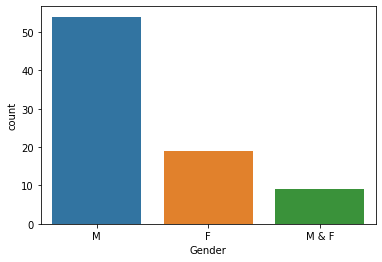

In [12]:
sns.countplot(x = 'Gender', data = data)

As visualized, the proportion of males to females is significatly huge. But let us explore exactly which gender predominate which department.

#Further Data Exploration
Checking out the rest of the data to see how each column affects our target.

In [13]:
data.columns

Index(['Department/Source', 'Name', 'Person', 'Gender', 'Reference',
       'Comments', 'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'Neighborhoods', 'SF Find Neighborhoods'],
      dtype='object')

In [14]:
data['Neighborhoods'].value_counts()

21    82
Name: Neighborhoods, dtype: int64

In [15]:
data['SF Find Neighborhoods'].value_counts()

21    82
Name: SF Find Neighborhoods, dtype: int64

In [16]:
data.drop('SF Find Neighborhoods', axis = 1, inplace = True)

In [17]:
data['Analysis Neighborhoods'].value_counts()

36    82
Name: Analysis Neighborhoods, dtype: int64

In [18]:
data['Current Supervisor Districts'].value_counts()

10    82
Name: Current Supervisor Districts, dtype: int64

In [19]:
data['Current Police Districts'].value_counts()

4    82
Name: Current Police Districts, dtype: int64

The columns; Current Police Districts,  Current Supervisor Districts, Analysis Neighborhoods, SF Find Neighborhoods, and Neighborhoods do not have any effect, neither do they give information because, although not missing any value, do not contain substantial information. 

In [20]:
data.isnull().sum()

Department/Source                0
Name                             0
Person                           1
Gender                           0
Reference                       28
Comments                        50
Current Police Districts         0
Current Supervisor Districts     0
Analysis Neighborhoods           0
Neighborhoods                    0
dtype: int64

In [21]:
data['Reference'].value_counts()

Municipal Transportation Agency                                                      9
City Administrator                                                                   8
Veterans Building                                                                    5
Public Utilities Commission                                                          4
Public Health                                                                        4
Airport (Sfo)                                                                        3
Davies Symphony Hall                                                                 3
War Memorial Opera House                                                             2
Port                                                                                 2
Public Works                                                                         2
Public Library                                                                       2
General Manager of San Francisco's Municipa

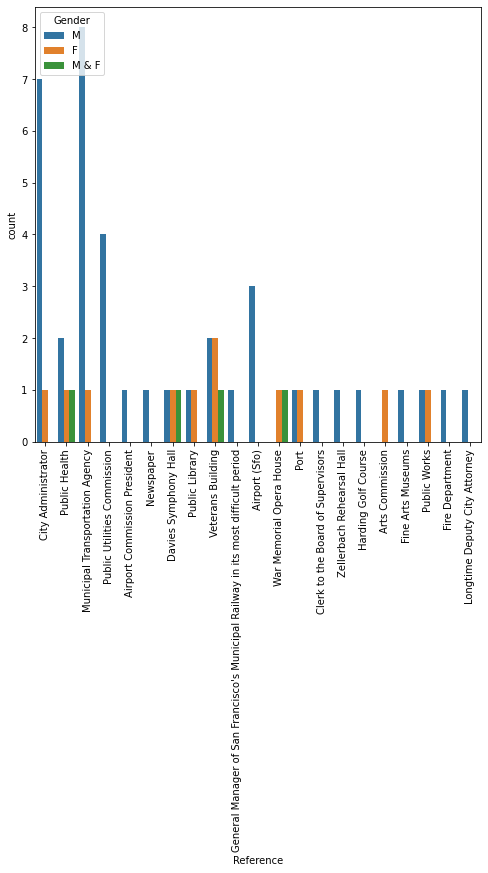

In [22]:
plt.figure(figsize=(8,8))
plt.xticks(rotation = 90)
sns.countplot(x = 'Reference', data = data, hue = 'Gender')

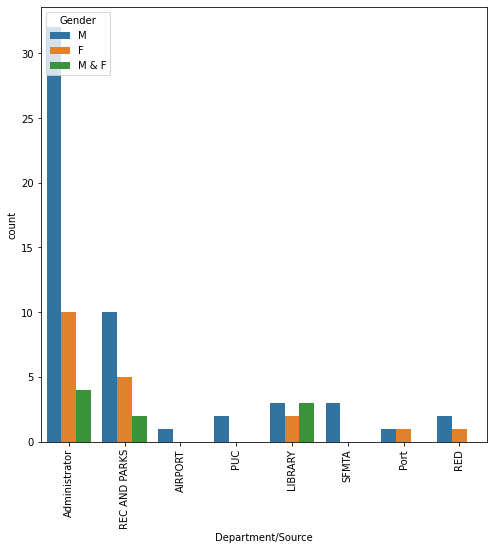

In [23]:
plt.figure(figsize=(8,8))
plt.xticks(rotation = 90)
sns.countplot(x = 'Department/Source', data = data, hue = 'Gender')

From this representation, we can see **administrators** are mostly **male**. In **REC and Parks, RED, Public health,** the number of **Females** are 50%. And we see **ties** between them in departments such as the **Port**. 

By reference (The first plot), we can also see **ties** in the **Public works, Verteran Buildings and Public Libraries**.

#**Conclusion**

By reference as well, we can see **Females** are solely represented in the Arts commission department. But we se how **Males** preponderate over Females evidently shown in the number of sole representation for males. 


We can safely say there are some departments where **males** majorly are in, like the General Manager roles, Administrators, Clerks,  Deputy City Attorneys, Airport workers, Fire Departments, golf course and Museums. Females aren't represented in such departments.